# 🩺 ECG Arrhythmia Dataset Overview

This dataset contains heartbeat-level features extracted from ECG signals across multiple arrhythmia databases.  
Each row represents two consecutive heartbeats (`Beat 0` and `Beat 1`) from a specific ECG record.

The goal is to classify the type of heartbeat (e.g., normal, ventricular, supraventricular) using timing, peak positions, and morphology features derived from the ECG signal.

### 📌 Dataset Highlights:
- **Total columns:** 44
- **Each sample includes:**
  - `record`: Source ECG file or patient ID
  - `type`: Label of the current beat (e.g., N, V, A, etc.)
  - **Beat 0 & Beat 1 features:**
    - RR intervals before and after the beat
    - P, Q, R, S, T peak locations
    - PQ, QRS, QT, ST intervals
    - QRS morphology (one-hot encoded)

This structured format makes the dataset suitable for traditional machine learning models such as Random Forest, SVM, or XGBoost.

> 🔍 Note: Understanding ECG physiology (like what QRS or QT means) helps interpret these features better, but it's not mandatory to start experimenting with classification models.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data =  pd.read_csv(r"../data/MIT-BIH Arrhythmia Database.csv")
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [10]:
data.shape

(100689, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

## 📝 وصف أعمدة البيانات

### ✅ أعمدة أساسية:
- `record`: رقم تسجيل الـ ECG (يعبر عن مريض أو جلسة ECG)
- `type`: نوع الضربة القلبية (مثل: `N`, `VEB`, `SVEB`, `F`, `Q`)

---

### 🧠 الأعمدة المشتقة من إشارة ECG:

#### كل مجموعة تبدأ بـ `0_` أو `1_`:
- `pre-RR`: المسافة الزمنية بين الضربة الحالية والسابقة (مؤشر لتسارع القلب)
- `post-RR`: المسافة الزمنية بين الضربة الحالية والتالية
- `pPeak`: قيمة قمة موجة الـ P
- `tPeak`: قيمة قمة موجة الـ T
- `rPeak`, `sPeak`, `qPeak`: قمم موجات QRS
- `qrs_interval`: طول مركب QRS (يدل على الزمن اللازم لانقباض البطين)
- `pq_interval`: الزمن بين P و Q (زمن التوصيل الأذيني-البطيني)
- `qt_interval`: الزمن من بداية Q لنهاية T (زمن الانقباض والانبساط الكامل)
- `st_interval`: الزمن بين نهاية S وبداية T

#### الخصائص الشكلية للموجة:
- `qrs_morph0` إلى `qrs_morph4`: تمثيل عددي لشكل مركب QRS (يستخدم لتحليل الشكل الكهربي للضربة)

---

🔁 ملاحظة:  
كل خصائص `0_` تخص الضربة الحالية  
كل خصائص `1_` تخص الضربة التالية


In [11]:
# Exclude non-numeric columns for summary
numeric_df = data.drop(columns=['record', 'type'])
summary = numeric_df.describe().T
summary[['mean', 'std', 'min', 'max']]

,mean,std,min,max
0_pre-RR,279.400947,81.915453,11.000000,2114.000000
0_post-RR,278.588207,81.124963,6.000000,2114.000000
0_pPeak,0.049772,0.168789,-3.094391,3.821118
0_tPeak,0.372262,0.739879,-2.006422,4.118327
0_rPeak,1.054485,0.617508,-2.372835,4.018918
0_sPeak,-0.134376,1.027590,-3.622550,4.018918
0_qPeak,-0.090466,0.189436,-3.871359,3.080710
0_qrs_interval,28.326858,15.027789,0.000000,170.000000
0_pq_interval,10.972817,9.468930,1.000000,150.000000
0_qt_interval,59.776093,40.386054,5.000000,334.000000


In [7]:
data["type"].value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64

### ✅ `type`: نوع الضربة القلبية

- `N` -> ضربة طبيعية (Normal beat)
- `VEB` -> ضربة بطينية مبكرة (Ventricular Ectopic Beat)  
  ⚠️ غير طبيعية، تنشأ من البطين قبل الموعد الطبيعي
- `SVEB` -> ضربة أذينية/فوق بطينية مبكرة (Supraventricular Ectopic Beat)  
  ⚠️ غير طبيعية، تنشأ من الأذين أو العقدة الأذينية البطينية
- `F` -> ضربة ناتجة عن الرجفان الأذيني (Fusion beat)  
  💡 مزيج بين ضربة طبيعية وضربة مبكرة
- `Q` -> غير قابلة للتصنيف أو غير محددة (Unknown / Unclassifiable beat)  
  ❓ ممكن تكون ضوضاء أو شكل غير واضح

## Plot class distribution in the MIT-BIH dataset

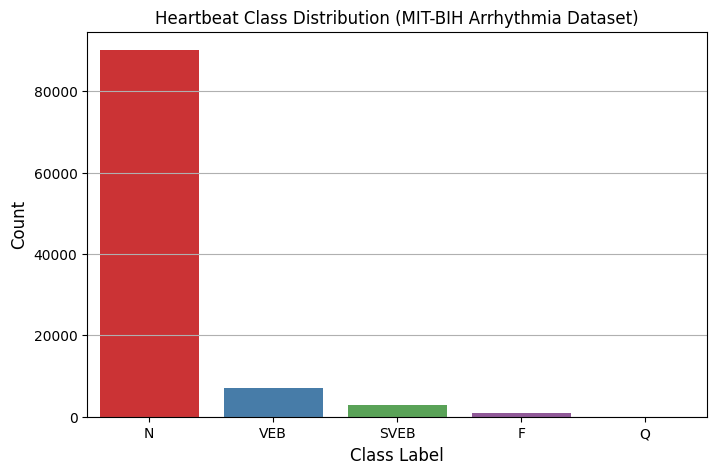

In [9]:
class_counts = data['type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    hue=class_counts.index,  
    palette='Set1',
    legend=False  
)
plt.title('Heartbeat Class Distribution (MIT-BIH Arrhythmia Dataset)', fontsize=12)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()
